Data Scientist: John Pan 

The dataset provides patient reviews on specific drugs along with related conditions and a 10 star patient rating reflecting overall patient satisfaction. The data was obtained by crawling online pharmaceutical review sites. The intention was to study

The data is split into a train (75%) a test (25%) partition (see publication) and stored in two .tsv (tab-separated-values) files, respectively.

Attribute Information:

1. drugName (categorical): name of drug
2. condition (categorical): name of condition
3. review (text): patient review
4. rating (numerical): 10 star patient rating
5. date (date): date of review entry
6. usefulCount (numerical): number of users who found review useful

We are going to perform some of useful feature engineers in regrad to textual data such as N-grams and EDA.

Applying Sentimental analysis for patient's feedback by using common machine learning models for textual data such as SVM, Logistic Regression and evaluate our model accuray.

In [1]:
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings     # for supressing a warning when importing large files
warnings.filterwarnings("ignore")
print('setup Completed^___^')

setup Completed^___^


In [4]:
#import data
os.chdir(r'H:\Drug Review')
data = pd.read_csv('drugsComTrain_raw.csv')
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [5]:
data.shape

(161297, 7)

In [6]:
data.isnull().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [7]:
#remove of rows with missing data
data.dropna(axis=0, inplace=True)

In [8]:
#remove some columns
data.drop(['uniqueID', 'condition', 'date','usefulCount'], axis=1, inplace=True)

In [9]:
data.head()

,drugName,review,rating
0,Valsartan,"""It has no side effect, I take it in combinati...",9
1,Guanfacine,"""My son is halfway through his fourth week of ...",8
2,Lybrel,"""I used to take another oral contraceptive, wh...",5
3,Ortho Evra,"""This is my first time using any form of birth...",8
4,Buprenorphine / naloxone,"""Suboxone has completely turned my life around...",9


In [10]:
data.tail()

,drugName,review,rating
161292,Campral,"""I wrote my first report in Mid-October of 201...",10
161293,Metoclopramide,"""I was given this in IV before surgey. I immed...",1
161294,Orencia,"""Limited improvement after 4 months, developed...",2
161295,Thyroid desiccated,"""I&#039;ve been on thyroid medication 49 years...",10
161296,Lubiprostone,"""I&#039;ve had chronic constipation all my adu...",9


In [11]:
data.shape

(160398, 3)

In [12]:
#Make the data a bit smaller
data = data[data.groupby('drugName')['drugName'].transform('size') > 20]

In [13]:
data.shape

(148594, 3)

,drugName,review,rating
0,Valsartan,"""It has no side effect, I take it in combinati...",9
1,Guanfacine,"""My son is halfway through his fourth week of ...",8
3,Ortho Evra,"""This is my first time using any form of birth...",8
4,Buprenorphine / naloxone,"""Suboxone has completely turned my life around...",9
5,Cialis,"""2nd day on 5mg started to work with rock hard...",2


In [15]:
print('the review column data types is:',data['review'].dtypes)
data['review'] = data['review'].astype(str)

the review column data types is: object


Converting to lower case is necessary. Otherwise, it will consider the same word with an uppercase as a different word. Like ‘me’ and ‘Me’ will be considered as different words.

In [16]:
data['review1'] = data['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['review1'].head()

0    "it has no side effect, i take it in combinati...
1    "my son is halfway through his fourth week of ...
3    "this is my first time using any form of birth...
4    "suboxone has completely turned my life around...
5    "2nd day on 5mg started to work with rock hard...
Name: review1, dtype: object

This step is to remove the punctuations. Because of punctuation, a word might be treated differently than it originally is. For example ‘use’ and ‘use:’ will become different words because of punctuation.

In [17]:
data['review1'] = data['review1'].str.replace('[^\w\s]', '')
data['review1'].head()

0    it has no side effect i take it in combination...
1    my son is halfway through his fourth week of i...
3    this is my first time using any form of birth ...
4    suboxone has completely turned my life around ...
5    2nd day on 5mg started to work with rock hard ...
Name: review1, dtype: object

Removing StopWords

In [18]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AH74731\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [19]:
data['review1'] = data['review1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['review1'].head()

0    side effect take combination bystolic 5 mg fis...
1    son halfway fourth week intuniv became concern...
3    first time using form birth control i039m glad...
4    suboxone completely turned life around feel he...
5    2nd day 5mg started work rock hard erections h...
Name: review1, dtype: object

Remove the Rare Words

In [20]:
freq = pd.Series(' '.join(data['review1']).split()).value_counts()
less_freq = list(freq[freq == 1].index)
less_freq

['bupoprion',
 'sono',
 '166111',
 'zoderm039s',
 'misogynist',
 'night10',
 'pavement',
 'promethazinecodeine',
 'asacol800',
 'metrorrage',
 'depersonlization',
 'meta',
 'endocirnologist',
 'famiclovr',
 'pmsdriven',
 'punishing',
 'anorexics',
 'inampout',
 'bel',
 'olanzepine',
 'horriblefeelings',
 'folowing',
 'socialgeneral',
 'dayswatch',
 'cll',
 'clindamyin',
 'sayyou',
 'rattlequotpercolatingquot',
 'miraclemover',
 'annulare',
 'oct2011',
 'tamaze',
 'alreadyfeeling',
 'wbreakfast',
 'steriodantifungal',
 'tranexamix',
 'invading',
 'bicornuate',
 'doctorsuggested',
 'dotsquot',
 'copayquot',
 'nursesdoctorstaff',
 'betty',
 'fibromaylgia',
 'sleepdon039t',
 'replaying',
 '31616',
 'fantasize',
 'shakyness',
 '81012',
 '039easy',
 'painsmine',
 'boehringer',
 'alberta',
 'impure',
 '039will',
 'zonegram',
 'gadgets',
 'bennifit',
 'hards',
 'myplate',
 'bleedingpregnancy',
 'interwoven',
 'pregnacies',
 '05222017',
 'freeblemish',
 'chests',
 'nodeprine',
 'tm',
 'me63',
 

In [23]:
data['review1'] = data['review1'].apply(lambda x: " ".join(x for x in x.split() if x not in less_freq))
data['review1'].head()

0    side effect take combination bystolic 5 mg fis...
1    son halfway fourth week intuniv became concern...
3    first time using form birth control i039m glad...
4    suboxone completely turned life around feel he...
5    2nd day 5mg started work rock hard erections h...
Name: review1, dtype: object

Stemming and lemmatization

In [26]:
from textblob import TextBlob, Word, Blobber
from nltk.stem import PorterStemmer
st = PorterStemmer()

In [27]:
data['review1'] = data['review1'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

In [29]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [35]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AH74731\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [36]:
data['review1'] = data['review1'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['review1'].head()

0         side effect take combin bystol 5 mg fish oil
1    son halfway fourth week intuniv becam concern ...
3    first time use form birth control i039m glad w...
4    suboxon complet turn life around feel healthie...
5    2nd day 5mg start work rock hard erect howev e...
Name: review1, dtype: object

Adding the length of the review and the word count of each review

In [37]:
data['review_len'] = data['review'].astype(str).apply(len)
data['word_count'] = data['review'].apply(lambda x: len(str(x).split()))

Add one more feature called polarity. Polarity shows the sentiment of a piece of text. It counts the negative and positive words and determines the polarity. The value ranges from -1 to 1 where -1 represents the negative sentiment, 0 represents neutral and 1 represent positive sentiment.

In [38]:
data['polarity'] = data['review1'].map(lambda text: TextBlob(text).sentiment.polarity)
data.head()

,drugName,review,rating,review1,review_len,word_count,polarity
0,Valsartan,"""It has no side effect, I take it in combinati...",9,side effect take combin bystol 5 mg fish oil,79,17,0.000000
1,Guanfacine,"""My son is halfway through his fourth week of ...",8,son halfway fourth week intuniv becam concern ...,741,141,0.237500
3,Ortho Evra,"""This is my first time using any form of birth...",8,first time use form birth control i039m glad w...,448,89,0.300000
4,Buprenorphine / naloxone,"""Suboxone has completely turned my life around...",9,suboxon complet turn life around feel healthie...,719,124,0.147037
5,Cialis,"""2nd day on 5mg started to work with rock hard...",2,2nd day 5mg start work rock hard erect howev e...,403,68,0.081667


array([[<AxesSubplot:title={'center':'review_len'}>,
        <AxesSubplot:title={'center':'word_count'}>],
       [<AxesSubplot:title={'center':'polarity'}>,
        <AxesSubplot:title={'center':'rating'}>]], dtype=object)

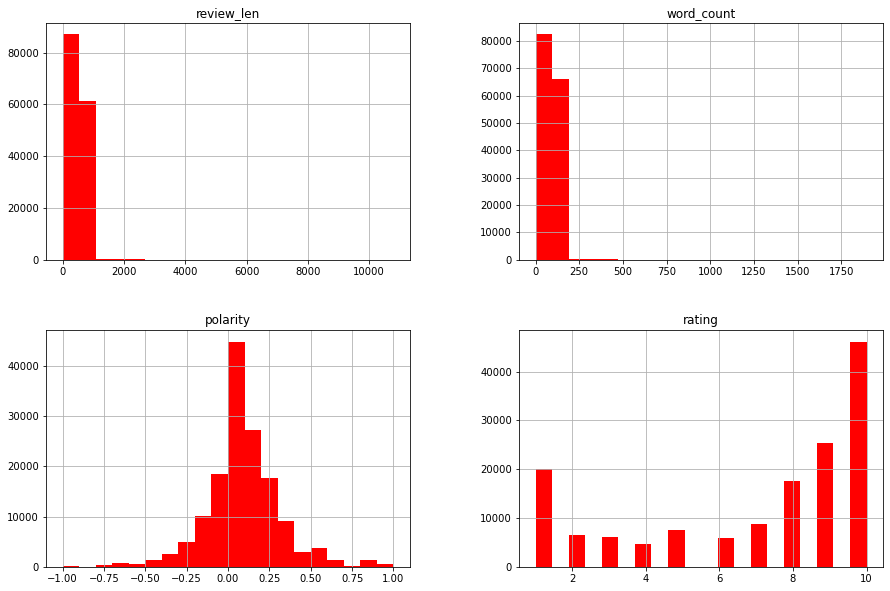

In [39]:
data[['review_len', 'word_count','polarity', 'rating']].hist(bins=20, figsize=(15, 10), color='red')

Rating VS Polarity

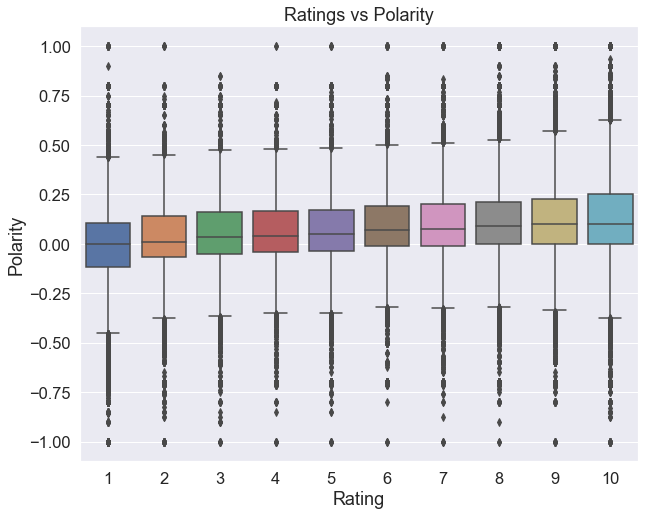

In [40]:
plt.figure(figsize=(10, 8))
sns.set_style('white')
sns.set(font_scale= 1.5)
sns.boxplot(x= 'rating', y='polarity', data=data)
plt.xlabel('Rating')
plt.ylabel('Polarity')
plt.title('Ratings vs Polarity')
plt.show()

Mean polarity keeps going up with the higher rating. There are a lot of outliers in rating 1 and 5 though. Maybe looking at the numbers will help a bit more.

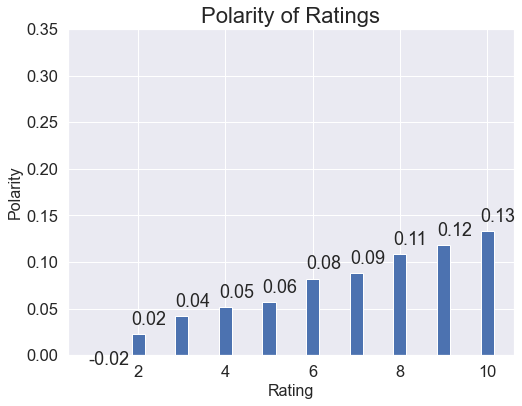

In [41]:
mean_pol = data.groupby('rating')['polarity'].agg([np.mean])
mean_pol.columns = ['mean_polarity']
fig, ax = plt.subplots(figsize=(8, 6))
plt.bar(mean_pol.index, mean_pol.mean_polarity, width=0.3)
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+0.01, str("{:.2f}".format(i.get_height())))
    plt.title("Polarity of Ratings", fontsize=22)
plt.ylabel("Polarity", fontsize=16)
plt.xlabel("Rating", fontsize=16)
plt.ylim(0, 0.35)
plt.show()

Count plot shows the count of the reviews of each rating available in the datase

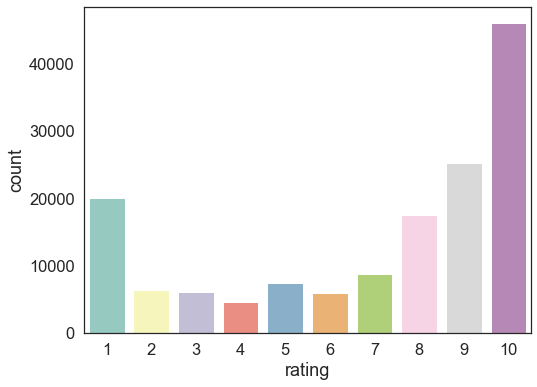

In [42]:
plt.figure(figsize=(8, 6))
sns.set_style('white')
ax = sns.countplot(x="rating", data=data, palette="Set3")

Most of the reviews of the dataset have a rating of 10, so it will be intersting to see if the review length changes with rating:

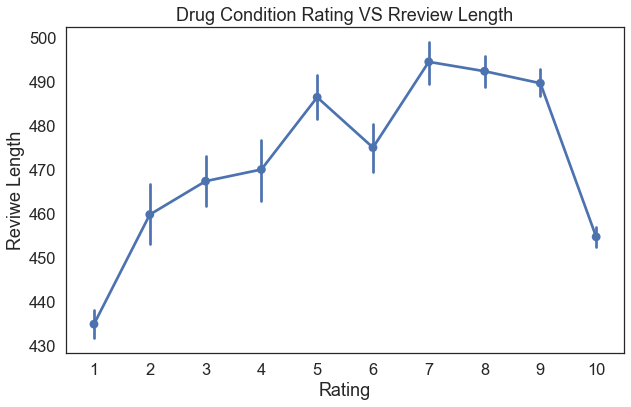

In [43]:
plt.figure(figsize=(10, 6))
sns.pointplot(x = 'rating', y='review_len', data=data)
plt.xlabel('Rating')
plt.ylabel('Reviwe Length')
plt.title('Drug Condition Rating VS Rreview Length')
plt.show()

Get the top 30 conditions based on polarity

In [44]:
condition_pol = data.groupby('drugName')['polarity'].agg([np.mean])
condition_pol.columns = ['polarity']
condition_pol = condition_pol.sort_values('polarity', ascending=False)
condition_pol = condition_pol.head(30)
condition_pol

,polarity
drugName,
Sulfacetamide sodium / sulfur,0.283512
Methadone Diskets,0.280751
Acetaminophen,0.275491
Trulance,0.255879
Plecanatide,0.253541
Roxicodone,0.247996
Oracea,0.242074
Stadol,0.226135
Meperidine,0.221162


WordCloud

Wordcloud is a common and beautiful visualization for text data to plot the frequency of words. You may need to install wordcloud if you do not have it already, using this command:

In [48]:
text = " ".join(review for review in data.review1)

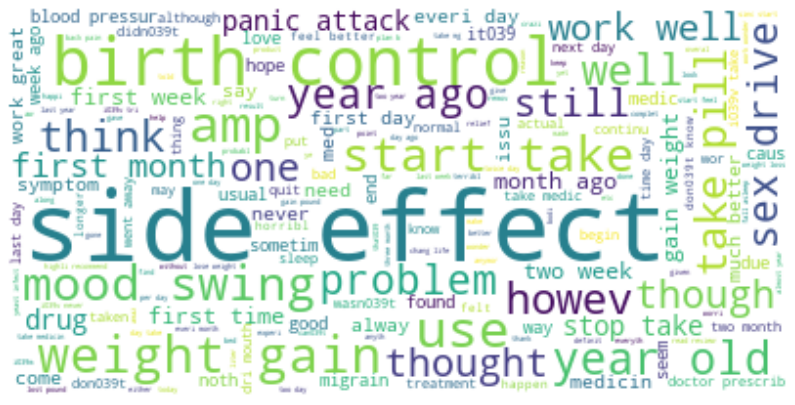

In [51]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords = stopwords.union(["ha", "thi", "now", "onli", "im", "becaus", "wa", "will", "even", "go", "realli", "didnt", "abl"])
wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000).generate(text)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

Frequency Charts

This is common practice in text data analysis to make charts of the frequency of words. That gives a good idea about what people are talking about most in this text. First, find the frequency of each word in the review column of the dataset. Then plot the top 20 words based on the frequency.

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data['review1'], 20)
df1 = pd.DataFrame(common_words, columns = ['Review', 'count'])
df1.head()

,Review,count
0,take,92439
1,day,90662
2,month,65435
3,year,61397
4,effect,58509


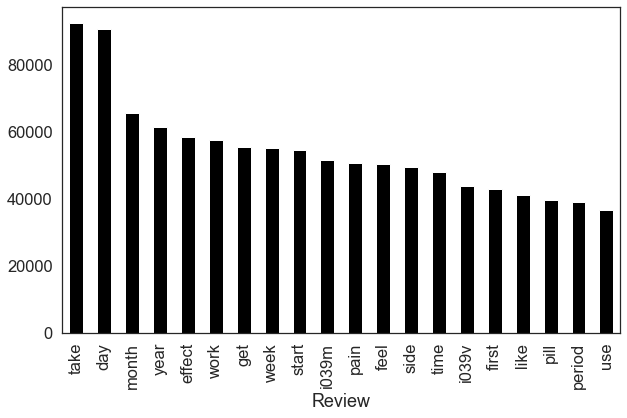

In [54]:
df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(kind='bar',color='black',figsize = (10, 6))
xlabel = 'Top Words'
ylabel = 'Count'
title = 'BarChart represent the Top Words Frequency'    
plt.show()

These are the topmost occurring words in the reviews. But instead of just seeing one word two consecutive words or three consecutive words are more helpful. They provide some meaning. The following plot shows the topmost frequent bigrams:

In [55]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(data['review1'], 30)
df2 = pd.DataFrame(common_words2, columns=['Review', "Count"])
df2.head()

,Review,Count
0,side effect,44752
1,birth control,15345
2,feel like,8453
3,weight gain,8294
4,start take,7903


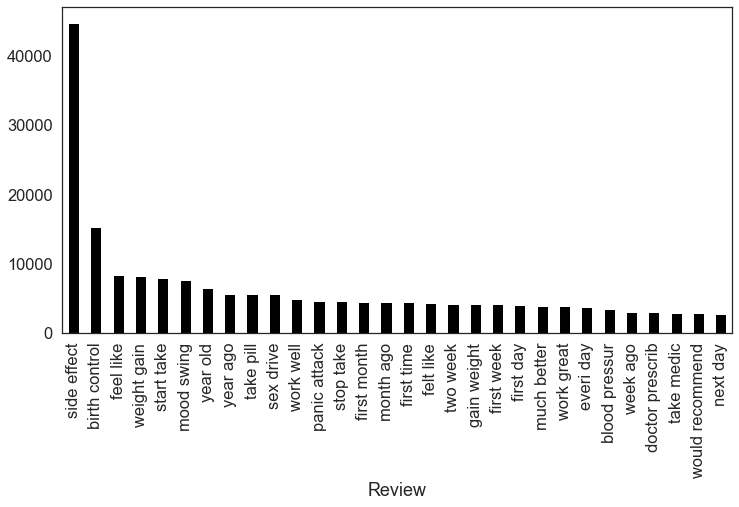

In [56]:
df2.groupby('Review').sum()['Count'].sort_values(ascending=False).plot(kind='bar',figsize=(12,6), color='black')
xlabel = "Bigram Words"
ylabel = "Count"
title = "Bar chart of Bigrams Frequency"
plt.show()

Look at the bigrams. They are somewhat phrases that make more sense. The next plot is the trigrams. Maybe that will provide us some more ideas about what people are saying in the reviews.

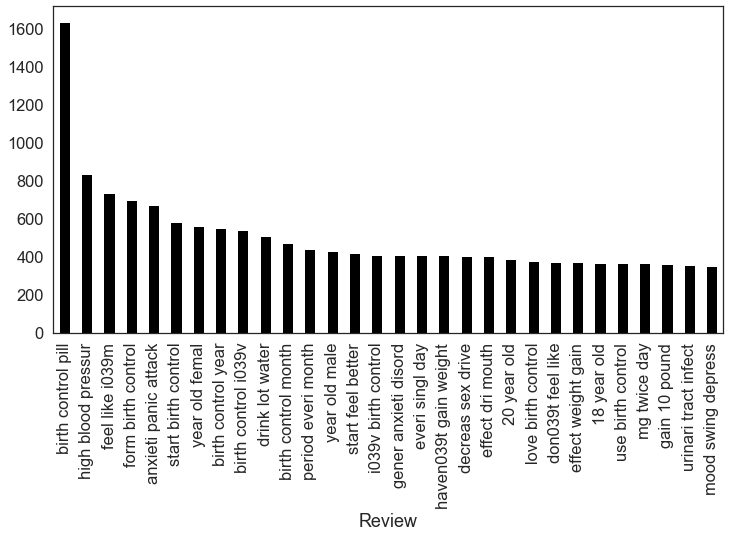

In [57]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words3 = get_top_n_trigram(data['review1'], 30)
df3 = pd.DataFrame(common_words3, columns = ['Review' , 'Count'])
df3.groupby('Review').sum()['Count'].sort_values(ascending=False).plot(kind='bar',figsize=(12,6), color='black')
xlabel = "Trigram Words"
ylabel = "Count"
title = "Bar chart of Trigrams Frequency"
plt.show()


Sentiment Analysis

In [58]:
data.head()

,drugName,review,rating,review1,review_len,word_count,polarity
0,Valsartan,"""It has no side effect, I take it in combinati...",9,side effect take combin bystol 5 mg fish oil,79,17,0.000000
1,Guanfacine,"""My son is halfway through his fourth week of ...",8,son halfway fourth week intuniv becam concern ...,741,141,0.237500
3,Ortho Evra,"""This is my first time using any form of birth...",8,first time use form birth control i039m glad w...,448,89,0.300000
4,Buprenorphine / naloxone,"""Suboxone has completely turned my life around...",9,suboxon complet turn life around feel healthie...,719,124,0.147037
5,Cialis,"""2nd day on 5mg started to work with rock hard...",2,2nd day 5mg start work rock hard erect howev e...,403,68,0.081667


In [59]:
data.rating.describe()

count    148594.000000
mean          6.963363
std           3.274728
min           1.000000
25%           4.000000
50%           8.000000
75%          10.000000
max          10.000000
Name: rating, dtype: float64

In [60]:
data.rating.value_counts()

10    46145
9     25355
1     20049
8     17512
7      8833
5      7503
2      6468
3      6106
6      5916
4      4707
Name: rating, dtype: int64

In [61]:
# Remove any Neutral ratings equal to 3 : 
data = data[data['rating'] != 3]
data['Positively Rated'] = np.where(data['rating'] > 3, 1, 0)
data.head(10)

,drugName,review,rating,review1,review_len,word_count,polarity,Positively Rated
0,Valsartan,"""It has no side effect, I take it in combinati...",9,side effect take combin bystol 5 mg fish oil,79,17,0.000000,1
1,Guanfacine,"""My son is halfway through his fourth week of ...",8,son halfway fourth week intuniv becam concern ...,741,141,0.237500,1
3,Ortho Evra,"""This is my first time using any form of birth...",8,first time use form birth control i039m glad w...,448,89,0.300000,1
4,Buprenorphine / naloxone,"""Suboxone has completely turned my life around...",9,suboxon complet turn life around feel healthie...,719,124,0.147037,1
5,Cialis,"""2nd day on 5mg started to work with rock hard...",2,2nd day 5mg start work rock hard erect howev e...,403,68,0.081667,0
6,Levonorgestrel,"""He pulled out, but he cummed a bit in me. I t...",1,pull cum bit took plan b 26 hour later took pr...,142,30,0.111111,0
7,Aripiprazole,"""Abilify changed my life. There is hope. I was...",10,abilifi chang life hope zoloft clonidin first ...,733,146,0.058681,1
8,Keppra,""" I Ve had nothing but problems with the Kepp...",1,noth problem keppera constant shake arm amp le...,193,35,0.200000,0
9,Ethinyl estradiol / levonorgestrel,"""I had been on the pill for many years. When m...",8,pill mani year doctor chang rx chateal effect ...,737,142,-0.085185,1
10,Topiramate,"""I have been on this medication almost two wee...",9,medic almost two week start 25mg work way 100m...,730,148,0.211111,1


In [62]:
data['Positively Rated'].mean()

0.8139001179046657

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['review1'], data['Positively Rated'], random_state = 0)

In [64]:
print('X_train first entry:\n\n', X_train.iloc[0])
print('\n\nX_train shape: ', X_train.shape)

X_train first entry:

 73 year old zoloft gener version sinc 1990 began see rheumatologist rheumat fever depress caus childhood sexual abus mind lock away time ill also angri contempl suicid could share stori shame stigma saw sad depress wrote script zoloft ever sinc start 50mg take 100mg save life saniti go counsel year later abl verbal feel forgiv thank rheumat fever led sweet doctor side effect know


X_train shape:  (106866,)


X_train first entry:

 zoloft save life it039 like wake lifelong nightmar lifetim panic attack stress anxieti percept 039normal039 still feel normal stress anxieti ration caus car broke lost job etc there039 feel quit like feel control life self


CountVectorizer:

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
# fit the countvectorizer to the training data: 
vect = CountVectorizer().fit(X_train)

In [66]:
vect.get_feature_names()[:2000]

['00',
 '000',
 '0001',
 '0002',
 '0009',
 '000vl',
 '001',
 '001mg',
 '002',
 '0025',
 '0025039',
 '0025mg',
 '003',
 '004',
 '005',
 '005mg',
 '006',
 '0075',
 '01',
 '010',
 '0100',
 '01012017',
 '010415',
 '010816',
 '0109',
 '0114',
 '011510',
 '011516',
 '0116',
 '0119',
 '012012',
 '012314',
 '01232014',
 '0125',
 '0125mg',
 '0137mcg',
 '0145',
 '015',
 '01mg',
 '02',
 '0200',
 '020116',
 '02012016',
 '020209',
 '0209',
 '02092016',
 '0212',
 '021410',
 '0218',
 '02182014',
 '02182016',
 '02192014',
 '022012022015',
 '022019',
 '02252016',
 '025',
 '02505mg',
 '025mg',
 '0270',
 '0282013',
 '02mg',
 '03',
 '0312',
 '032009',
 '0324',
 '0325',
 '032715',
 '033015',
 '035',
 '0375',
 '0375mg',
 '039',
 '03901',
 '03903',
 '039039brutal039039',
 '039039cure039039',
 '039039now',
 '03905',
 '03906',
 '03907',
 '03908',
 '03909',
 '03910',
 '03910039',
 '03911',
 '03912',
 '03913',
 '03914',
 '03915',
 '03916',
 '03917',
 '0393',
 '03948',
 '03980039',
 '03990039',
 '0399039',
 '0399

In [67]:
len(vect.get_feature_names())

36778

In [68]:
# transform the documents in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<106866x36778 sparse matrix of type '<class 'numpy.int64'>'
	with 3965825 stored elements in Compressed Sparse Row format>

In [69]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression()

In [70]:
from sklearn.metrics import accuracy_score

# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))

print('Acurracy: ', accuracy_score(y_test, predictions))

Acurracy:  0.8802706192802201


In [71]:
# get the feature names as numpy array
feature_names = np.array(vect.get_feature_names())

# Sort the coefficients from the model
sorted_coef_index = model.coef_[0].argsort()

# Find the 10 smallest and 10 largest coefficients
# The 10 largest coefficients are being indexed using [:-11:-1] 
# so the list returned is in order of largest to smallest
print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['garbag' 'proair' 'percentag' 'disappoint' 'bayer' 'refund' 'unsettl'
 'useless' 'qualitest' 'b4']

Largest Coefs: 
['saver' 'lifesav' 'miracl' 'chlamydia' 'downfal' 'changer' 'drixor'
 'miracul' 'brownish' 'drawback']


In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df=5).fit(X_train)
len(vect.get_feature_names())

12238

In [73]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.8790635000842176


In [74]:
feature_names = np.array(vect.get_feature_names())

sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

print('Smallest tfidf:\n{}\n'.format(feature_names[sorted_tfidf_index[:10]]))
print('Largest tfidf: \n{}'.format(feature_names[sorted_tfidf_index[:-11:-1]]))

Smallest tfidf:
['pear' 'mononess' 'lowresidu' 'indonesia' 'quotm' 'doctoru2019' 'particl'
 'constitut' 'clearquot' 'heterozyg']

Largest tfidf: 
['miracl' 'noth' 'ok' 'far' 'fantast' 'take' 'best' 'hate' 'averag'
 'optim']


In [75]:
sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['wors' 'disappoint' 'worst' 'wast' 'useless' 'horribl' 'ruin' 'money'
 'garbag' 'poison']

Largest Coefs: 
['miracl' 'love' 'amaz' 'great' 'best' 'wonder' 'year' 'excel' 'far'
 'gone']


N-grams

In [76]:
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

151302

In [77]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('Accuracy: ', accuracy_score(y_test, predictions))

Accuracy:  0.9256639155578014


In [78]:
feature_names = np.array(vect.get_feature_names())

sorted_coef_index = model.coef_[0].argsort()

print('Smallest Coefs:\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Largest Coefs: \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))

Smallest Coefs:
['useless' 'disappoint' 'stay away' 'garbag' 'glad work'
 'wouldn039t recommend' 'poison' 'ye help' 'don039t recommend' 'wast']

Largest Coefs: 
['chang life' 'excel' 'miracl' 'lifesav' 'amaz' 'awesom'
 'highli recommend' 'downsid' 'best' 'fantast']


Support Vector Machine

In [79]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_vectorized, y_train)

#Predict the response for test dataset
predictions = clf.predict(vect.transform(X_test))

In [80]:
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.9159788894503397
